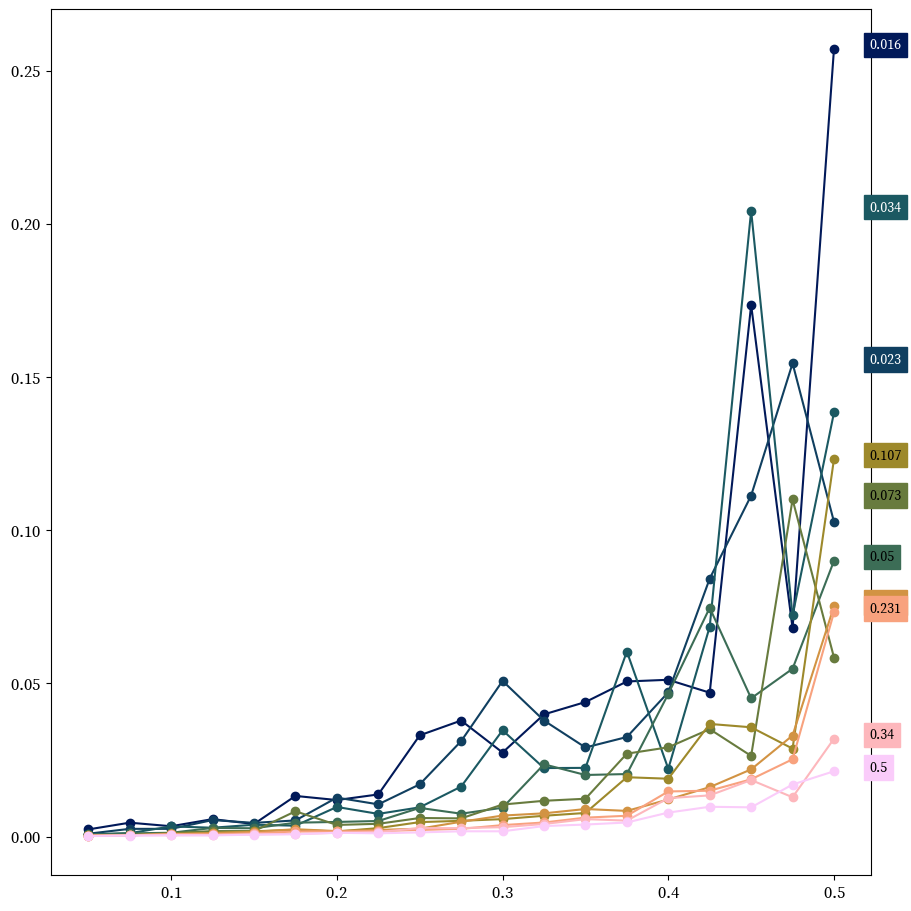

In [45]:
#| code-fold: true
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir("/project/persistent-exclusion-process")

import glob

import h5py
import matplotlib.pyplot as plt
import numpy as np
from cmcrameri import cm
from scipy import ndimage
import pandas as pd

from src.plot_utils import get_plot_configs
from src.stringato import extract_floats
from src.utils import get_ds_iters, get_cluster_labels

files = sorted(glob.glob("no_roll_data/dataset*"))
stuff = []
densities = []
for file in files:
    tumble = float(extract_floats(file)[0])
    density = float(extract_floats(file)[1])
    stuff.append((tumble, density))
    densities.append(density)
densities = sorted(set(densities))


plot_configs = get_plot_configs()
plot_configs["xtick.labelsize"] = 12
plot_configs["ytick.labelsize"] = 12
plt.rcParams.update(plot_configs)
fig, axis = plt.subplots(figsize=(9,9), constrained_layout=True)

colors = cm.batlow(np.linspace(0,2,len(densities)))
ctr = 0
ratios = []
map_size = 128*128

for idx, file in enumerate(files):
    noot = idx % len(densities)
    labelled, _ = get_cluster_labels(file, -1)
    cluster_sizes = np.bincount(labelled.flatten())[1:]
    biggest_cluster = np.max(cluster_sizes)
    ratios.append(biggest_cluster/map_size)
    if (noot == len(densities) - 1):
        axis.plot(densities,ratios, c=colors[ctr], marker='o')
        axis.annotate(
            text=f"{stuff[idx][0]}",
            xy=(densities[-1],np.max(ratios)),
            xytext=(25.5,0),
            fontsize=10,
            textcoords="offset points",
            backgroundcolor=colors[ctr],
            color=("white" if ctr in (0,1,2) else "black")
        )
        ratios = []
        ctr += 1
fig.show()
fig.savefig("plots/perc_rho.pdf")